In [1]:
import circuitq as cq
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import pygraphviz

In [2]:
# 1 junction
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'L')
graph.add_edge(0,2, element = 'C')
graph.add_edge(0,3, element = 'C')
graph.add_edge(1,2, element = 'C')
graph.add_edge(1,3, element = 'C')
graph.add_edge(2,3, element = 'J')

circuit = cq.CircuitQ(graph, ground_nodes=[0])

In [ ]:
# 2 junctions
graph = nx.MultiGraph()
graph.add_edge(0,1, element = 'C')
graph.add_edge(0,1, element = 'L')
graph.add_edge(0,2, element = 'C')
graph.add_edge(0,4, element = 'C')
graph.add_edge(1,2, element = 'C')
graph.add_edge(1,4, element = 'C')
graph.add_edge(3,4, element = 'J')
graph.add_edge(2,3, element = 'J')

circuit = cq.CircuitQ(graph, ground_nodes=[0])

In [ ]:
# cq.visualize_circuit_general(graph, 'D:')

In [3]:
circuit.h

-E_{J230}*cos((-\Phi_{2} + \Phi_{3})/\Phi_{o}) + 0.5*q_{1}*(q_{1}*(C_{02}*C_{03} + C_{02}*C_{13} + C_{02}*Cp_{23} + C_{03}*C_{12} + C_{03}*Cp_{23} + C_{12}*C_{13} + C_{12}*Cp_{23} + C_{13}*Cp_{23})/(C_{01}*C_{02}*C_{03} + C_{01}*C_{02}*C_{13} + C_{01}*C_{02}*Cp_{23} + C_{01}*C_{03}*C_{12} + C_{01}*C_{03}*Cp_{23} + C_{01}*C_{12}*C_{13} + C_{01}*C_{12}*Cp_{23} + C_{01}*C_{13}*Cp_{23} + C_{02}*C_{03}*C_{12} + C_{02}*C_{03}*C_{13} + C_{02}*C_{12}*C_{13} + C_{02}*C_{12}*Cp_{23} + C_{02}*C_{13}*Cp_{23} + C_{03}*C_{12}*C_{13} + C_{03}*C_{12}*Cp_{23} + C_{03}*C_{13}*Cp_{23}) + q_{2}*(C_{03}*C_{12} + C_{12}*C_{13} + C_{12}*Cp_{23} + C_{13}*Cp_{23})/(C_{01}*C_{02}*C_{03} + C_{01}*C_{02}*C_{13} + C_{01}*C_{02}*Cp_{23} + C_{01}*C_{03}*C_{12} + C_{01}*C_{03}*Cp_{23} + C_{01}*C_{12}*C_{13} + C_{01}*C_{12}*Cp_{23} + C_{01}*C_{13}*Cp_{23} + C_{02}*C_{03}*C_{12} + C_{02}*C_{03}*C_{13} + C_{02}*C_{12}*C_{13} + C_{02}*C_{12}*Cp_{23} + C_{02}*C_{13}*Cp_{23} + C_{03}*C_{12}*C_{13} + C_{03}*C_{12}*Cp_{23} +

In [ ]:
np.pi*circuit.phi_0  # Half of flux quantum

In [4]:
Ej = 1.3252140000000002e-23
Ec = 1.353706101e-25
phi_ext = np.pi*circuit.phi_0

In [5]:
circuit.charge_basis_nodes

[2, 3]

In [18]:
dim = 30
h_num = circuit.get_numerical_hamiltonian(60)
eigv, eigs = circuit.get_eigensystem()
# circuit.transform_charge_to_flux()
eigs = circuit.estates_in_phi_basis

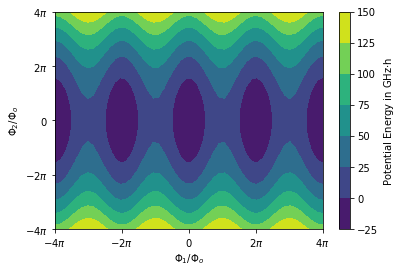

In [13]:
def potential(phi_1, phi_2):
    return (-Ej*np.cos(phi_1/circuit.phi_0) + phi_2**2/(2*circuit.c_v['L']))
phis = np.linspace(-4*np.pi*circuit.phi_0, 4*np.pi*circuit.phi_0, dim)
h = 6.62607015e-34
y_scaling = 1/(h *1e9)
potential_list = [potential(phi_1,phi_2)*y_scaling for phi_2 in phis for phi_1 in phis]
plt.contourf(phis, phis, np.array(potential_list).reshape(dim,dim))
plt.xticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
           [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
plt.yticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
           [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
plt.xlabel(r"$\Phi_1 / \Phi_o$")
plt.ylabel(r"$\Phi_2 / \Phi_o$")
plt.colorbar(label="Potential Energy in GHz$\cdot$h")
plt.show()

In [19]:
circuit.transform_charge_to_flux()

MemoryError: Unable to allocate 768. GiB for an array with shape (226981, 226981) and data type complex128

IndexError: list index out of range

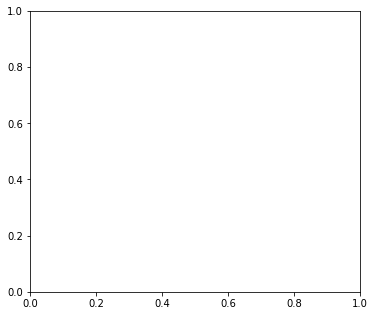

In [15]:
plt.figure(figsize=(13,30))
for n in range(10):
    plt.subplot(5,2, n+1)
    plt.contourf(circuit.flux_list, circuit.flux_list,
        abs(np.array(eigs[n].reshape(circuit.n_dim,circuit.n_dim)).transpose())**2)
    plt.colorbar()
    plt.title("Eigenstate " + str(n) )
    plt.xticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
               [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
    plt.yticks(np.linspace(-4*np.pi, 4*np.pi, 5)*circuit.phi_0 ,
               [r'$-4\pi$',r'$-2\pi$',r'$0$',r'$2\pi$',r'$4\pi$'])
    plt.xlabel(r"$\Phi_1 / \Phi_o$")
    plt.ylabel(r"$\Phi_2 / \Phi_o$")
plt.show()